In [1]:
from geometric_network import Network_Model
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [21]:
ground_truth = Network_Model(100)
lambda_true,c_true,r_true = 0.3, 0.6, 0.2
ground_truth.set_params([lambda_true,c_true,r_true])
positions = ground_truth.sample_position()
A = ground_truth.sample_network(positions)
true_positions = positions

In [47]:
# # # # list(it.chain(*[ground_truth.sample_position() for i in range(100)]))

Text(0.5, 0, '$\\theta$')

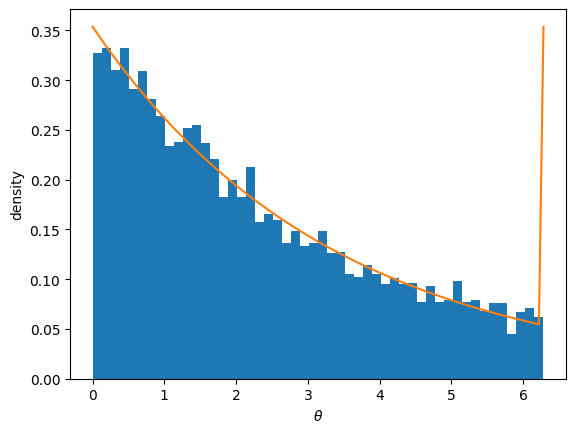

In [32]:
fig,ax = plt.subplots()
ax.hist(list(it.chain(*[ground_truth.sample_position() for i in range(100)])), density=True,bins=50)
xspace = np.linspace(0,2*np.pi,100)
a = np.exp(-ground_truth.position_logpartition())
ax.plot(xspace,a*np.exp(-ground_truth.position_hamiltonian(xspace)))
ax.set_ylabel("density")
ax.set_xlabel(r"$\theta$")

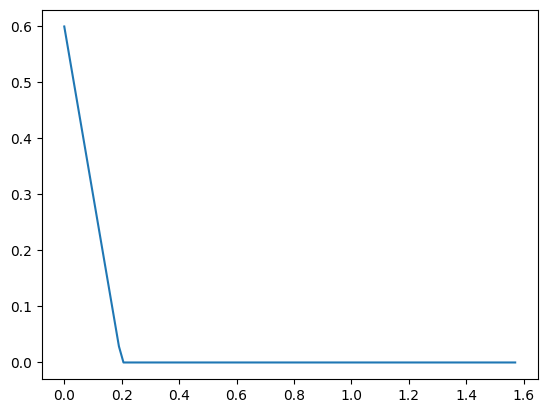

In [46]:
xspace = np.linspace(0,0.5*np.pi,100)
p = np.exp(-ground_truth.nlog_connection_p(xspace))
plt.plot(xspace, p)

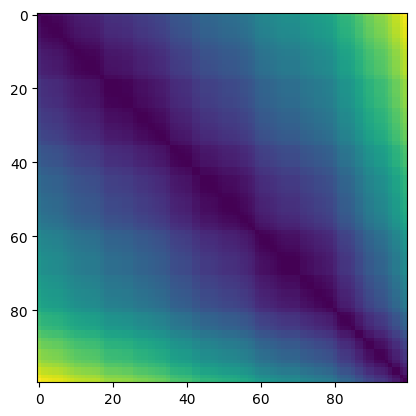

In [51]:
distances = np.abs((pos_sorted.reshape(-1,1) - pos_sorted.reshape(1,-1)))
plt.imshow(distances)

array([[0.        , 2.12151719, 5.252253  , ..., 0.61663528, 1.49268004,
        1.56264695],
       [2.12151719, 0.        , 3.13073582, ..., 1.50488191, 0.62883715,
        0.55887024],
       [5.252253  , 3.13073582, 0.        , ..., 4.63561773, 3.75957297,
        3.68960606],
       ...,
       [0.61663528, 1.50488191, 4.63561773, ..., 0.        , 0.87604476,
        0.94601167],
       [1.49268004, 0.62883715, 3.75957297, ..., 0.87604476, 0.        ,
        0.06996691],
       [1.56264695, 0.55887024, 3.68960606, ..., 0.94601167, 0.06996691,
        0.        ]])

/var/folders/ws/r0d9q2dj6qj7w5m7rm755ccnl701n6/T/ipykernel_1337/3449793763.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


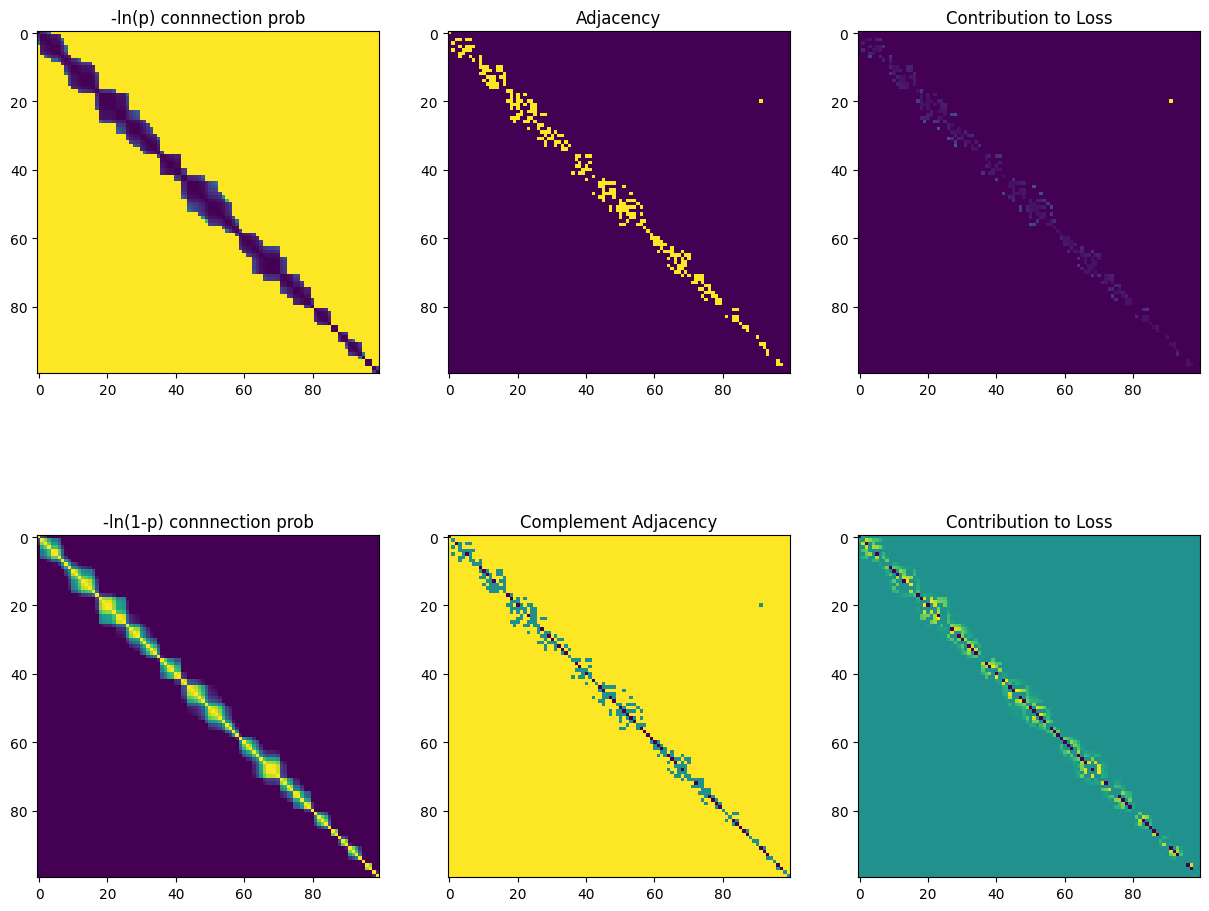

In [33]:
n_nodes = A.shape[0]

sort_args = np.argsort(positions)
pos_sorted = positions[sort_args]
A_sorted = A[sort_args,:][:,sort_args]


nlogp_interaction_values = ground_truth.nlogp_interaction(pos_sorted)
p_interaction = np.exp(-nlogp_interaction_values)

fig,axes = plt.subplots(nrows=2,ncols = 3, figsize = [15,12])
ax_row = axes[0,:]
ax_1a,ax_1b,ax_1c = ax_row
ax_1a.imshow(nlogp_interaction_values)
ax_1a.set_title("-ln(p) connnection prob")
ax_1b.imshow(A_sorted)
ax_1b.set_title("Adjacency")
ax_1c.imshow(nlogp_interaction_values*A_sorted)
ax_1c.set_title("Contribution to Loss")

ax_row = axes[1,:]
ax_2a,ax_2b,ax_2c = ax_row
ax_2a.imshow(-np.log(1-p_interaction+0.0001))
ax_2a.set_title("-ln(1-p) connnection prob")
ax_2b.imshow((np.ones(n_nodes)-np.eye(n_nodes) - A_sorted))
ax_2b.set_title("Complement Adjacency")
ax_2c.imshow(-(np.log(1-p_interaction+0.0001))*(np.ones(n_nodes)-np.eye(n_nodes) - A_sorted))
ax_2c.set_title("Contribution to Loss")
fig.show()




In [34]:
"""
from geometric_network import Network_Model

ground_truth = Network_Model(100)
ground_truth.set_params([0.5, 0.5, 0.5])
positions = ground_truth.sample_position()
A = ground_truth.sample_network(positions)
true_positions = positions


D = np.diag(np.sum(A,axis=1)**(-0.5))
evals,eigen = np.linalg.eigh(D @ A @ D)
unscaled = eigen[:,-1]
positions = scipy.stats.rankdata(unscaled)/len(unscaled)
start_positions = positions


def reflecting(x,T):
    if 0 < x <= T:
        return x
    elif T < x <= 2*T:
        return T - (x - T)
    elif -T < x <= 0:
        return -x
    print(x)
    raise IndexError

current = Network_Model(100)
current.set_params([0.1, 0.1, 0.1])

test = Network_Model(100)
test.set_params([0.1, 0.1, 0.1])

params_out = []
positions_out = []
import tqdm
for _ in tqdm.trange(100):

    noise = 0.01

    test_c_ = reflecting(current.c_ + noise*np.random.randn(), 1.0)
    test_r_ = reflecting(current.r_ + noise*np.random.randn(), 0.5)
    test_lambda_ = reflecting(current.lambda_ + noise*np.random.randn(), np.inf)
    test_params = [test_lambda_, test_c_, test_r_]
    test.set_params(test_params)

    nlogp_old = current.nlogp(A,positions)
    nlogp_test = test.nlogp(A,positions)
    # should be *smaller* when the new position is higher probability
    # i.e, when -lnp(test) is small compared to -lnp(previous)
    nlogp_diff =  nlogp_test - nlogp_old
    p = np.exp(-nlogp_diff)
    if p > np.random.rand():
        current.set_params(test.params)
        params_out.append(current.params)

    test_positions = np.array([reflecting(x + noise*np.random.randn(), 2*np.pi) for x in positions])

    nlogp_old  = current.nlogp(A,positions)
    nlogp_test = current.nlogp(A,test_positions)
    # should be *smaller* when the new position is higher probability
    # i.e, when -lnp(test) is small compared to -lnp(previous)
    nlogp_diff =  nlogp_test - nlogp_old
    p = np.exp(-nlogp_diff)
    if p > np.random.rand():

        positions = test_positions
        positions_out.append(positions)
    


import pandas as pd
pd.DataFrame(params_out).to_csv("params.csv")
pd.DataFrame(positions_out).to_csv("positions.csv")

n_nodes = A.shape[0]

sort_args = np.argsort(positions)
pos_sorted = positions[sort_args]
A_sorted = A[sort_args,:][:,sort_args]


positions = np.linspace(0,2*np.pi,100)
nlogp_interaction_values = ground_truth.nlogp_interaction(pos_sorted)
p_interaction = np.exp(-nlogp_interaction_values)

fig,axes = plt.subplots(nrows=2,ncols = 3, figsize = [15,12])
ax_row = axes[0,:]
ax_1a,ax_1b,ax_1c = ax_row
ax_1a.imshow(nlogp_interaction_values)
ax_1a.set_title("-ln(p) connnection prob")
ax_1b.imshow(A_sorted)
ax_1b.set_title("Adjacency")
ax_1c.imshow(nlogp_interaction_values*A_sorted)
ax_1c.set_title("Contribution to Loss")

ax_row = axes[1,:]
ax_2a,ax_2b,ax_2c = ax_row
ax_2a.imshow(-np.log(1-p_interaction+0.0001))
ax_2a.set_title("-ln(1-p) connnection prob")
ax_2b.imshow((np.ones(n_nodes)-np.eye(n_nodes) - A_sorted))
ax_2b.set_title("Complement Adjacency")
ax_2c.imshow(-(np.log(1-p_interaction+0.0001))*(np.ones(n_nodes)-np.eye(n_nodes) - A_sorted))
ax_2c.set_title("Contribution to Loss")
fig.show()







plt.scatter(true_positions, positions)
#plt.plot([0,2*np.pi], [0, 2*np.pi],c='r')
plt.show()




plt.scatter(true_positions, start_positions)
#plt.plot([0,2*np.pi], [0, 2*np.pi],c='r')
plt.show()


"""

'\nfrom geometric_network import Network_Model\n\nground_truth = Network_Model(100)\nground_truth.set_params([0.5, 0.5, 0.5])\npositions = ground_truth.sample_position()\nA = ground_truth.sample_network(positions)\ntrue_positions = positions\n\n\nD = np.diag(np.sum(A,axis=1)**(-0.5))\nevals,eigen = np.linalg.eigh(D @ A @ D)\nunscaled = eigen[:,-1]\npositions = scipy.stats.rankdata(unscaled)/len(unscaled)\nstart_positions = positions\n\n\ndef reflecting(x,T):\n    if 0 < x <= T:\n        return x\n    elif T < x <= 2*T:\n        return T - (x - T)\n    elif -T < x <= 0:\n        return -x\n    print(x)\n    raise IndexError\n\ncurrent = Network_Model(100)\ncurrent.set_params([0.1, 0.1, 0.1])\n\ntest = Network_Model(100)\ntest.set_params([0.1, 0.1, 0.1])\n\nparams_out = []\npositions_out = []\nimport tqdm\nfor _ in tqdm.trange(100):\n\n    noise = 0.01\n\n    test_c_ = reflecting(current.c_ + noise*np.random.randn(), 1.0)\n    test_r_ = reflecting(current.r_ + noise*np.random.randn(), 0.